importar las librerias

In [31]:
import networkx as nx
import wntr
import matplotlib.pyplot as plt
import matplotlib.animation as animation

importamos el archivo de la red (*.inp) y lo gurada en la variable 

In [32]:
wn = wntr.network.WaterNetworkModel('nets_examples/Net3.inp')

Converimos la red importada a un multugrafo dirigido

In [33]:
G = wn.get_graph() # directed multigraph

Convertimos el grafo G (multigrafo dirigido) a un grafo (multigrafo) no dirigido

In [34]:
uG = G.to_undirected() 

Convertimos el grafo uG (multigrafo no dirigido) a un grafo simple (no es multi ni dirigido)

In [35]:
sG = nx.Graph(uG)

# Graficas

Network animation can be generated using the function network_animation. Node and link attributes can be specified using pandas DataFrames, where the index is time and columns are the node or link name.

The following example creates a network animation of water age over time.

In [56]:
wn.options.quality.mode = 'AGE'
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
water_age = results.node['quality']/3600 # convert seconds to hours
print(water_age)

name     10   15   20   35   40   50   60  601   61  101  ...  267  269  271  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
900     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1800    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2700    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3600    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
601200  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
602100  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
603000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
603900  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
604800  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

name    273  275  River  Lake    1    2

<Figure size 432x288 with 0 Axes>

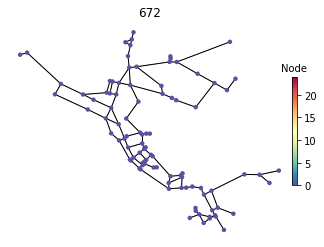

In [55]:
fig = plt.figure()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
anim = wntr.graphics.network_animation(wn, node_attribute=water_age, node_range=[0,24],repeat=True)
with open("myvideo.html", "w") as f:
    print(anim.to_html5_video(), file=f)